In [57]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow as tf
tf.random.set_seed(112)

In [58]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Activation, Dropout   #to define model/ layers

from sklearn.metrics import confusion_matrix, classification_report

In [276]:
# puts data from the csv into a pandas dataframe with headings
df = pd.read_csv((r'C:\Users\ellio\OneDrive\Documents\ComSci 3rd year\Computational Intelligence\wdbc.csv'), names=['id', 'diagnosis', 'f1', 'f2','f3', 'f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30'])
# drops the id attribute off all instances in the dataset and stores it
df.drop('id', axis=1, inplace=True)

In [277]:
# create copy of the dataframe to apply normalisation
df_normalised = df.copy()
  
# Normalize each features to the range of [0, 1]
normfeatures = ['f1', 'f2','f3', 'f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
df_normalised[normfeatures] = (df_normalised[normfeatures] - df_normalised[normfeatures].min()) / (df_normalised[normfeatures].max() - df_normalised[normfeatures].min())    
   
# view normalized data
display(df_normalised)

,diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [278]:
# change the diagnosis to 1 and 0 for target ouputs of the neural network
df_normalised['diagnosis'] = df['diagnosis'].replace(['M','B'],['1','0'], inplace=True )

display(df_normalised)

,diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,None,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,None,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,None,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,None,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,None,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,None,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,None,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,None,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,None,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [279]:
# changing the datatype of the target outputs to int64
df_normalised['diagnosis'] = pd.to_numeric(df['diagnosis'])

display(df_normalised)

,diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,1,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [280]:
# create a dataframe from random 70% of normalised set for the training set
training_set = df_normalised.sample(frac = 0.70)
 
# create a dataframe from the left over 30% for the testing set
testing_set = df_normalised.drop(training_set.index)
 

In [281]:
# creating the training set arrays
training_outputs = training_set[['diagnosis']].to_numpy()
training_outputs = training_outputs.astype('float64')
training_inputs = training_set[['f1', 'f2','f3', 'f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']].to_numpy()

In [282]:
# creating the testing set arrays
testing_inputs = testing_set[['f1', 'f2','f3', 'f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']].to_numpy()

testing_outputs = testing_set[['diagnosis']].to_numpy()
testing_outputs = testing_outputs.astype('float64')

In [283]:
model_1 = Sequential()
model_1.add(Dense(15, input_dim=30, activation='tanh', name='m1_hidden1_layer'))
model_1.add(Dense(2, activation='sigmoid', name='m1_output_layer'))


opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model_1.compile(optimizer= opt, 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy', 'MeanSquaredError'])

In [294]:
history = model_1.fit(training_inputs, training_outputs, batch_size=199, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 503us/step - loss: 0.3516 - accuracy: 0.9146 - mean_squared_error: 0.2853
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3510 - accuracy: 0.9146 - mean_squared_error: 0.2855
Epoch 3/500
2/2 [==============================] - 0s 998us/step - loss: 0.3505 - accuracy: 0.9146 - mean_squared_error: 0.2856
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.9146 - mean_squared_error: 0.2857
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.9146 - mean_squared_error: 0.2859
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.9146 - mean_squared_error: 0.2860
Epoch 7/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3483 - accuracy: 0.9146 - mean_squared_error: 0.2860
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.9146 - mean_squa

2/2 [==============================] - 0s 499us/step - loss: 0.3186 - accuracy: 0.9171 - mean_squared_error: 0.2931
Epoch 66/500
2/2 [==============================] - 0s 500us/step - loss: 0.3181 - accuracy: 0.9171 - mean_squared_error: 0.2932
Epoch 67/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.9171 - mean_squared_error: 0.2933
Epoch 68/500
2/2 [==============================] - 0s 999us/step - loss: 0.3172 - accuracy: 0.9171 - mean_squared_error: 0.2933
Epoch 69/500
2/2 [==============================] - 0s 500us/step - loss: 0.3168 - accuracy: 0.9171 - mean_squared_error: 0.2936
Epoch 70/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.9171 - mean_squared_error: 0.2936
Epoch 71/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.9171 - mean_squared_error: 0.2937
Epoch 72/500
2/2 [==============================] - 0s 500us/step - loss: 0.3154 - accuracy: 0.9171 - mean_squared_e

2/2 [==============================] - 0s 499us/step - loss: 0.2917 - accuracy: 0.9146 - mean_squared_error: 0.2991
Epoch 129/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.9146 - mean_squared_error: 0.2991
Epoch 130/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2909 - accuracy: 0.9146 - mean_squared_error: 0.2992
Epoch 131/500
2/2 [==============================] - 0s 500us/step - loss: 0.2906 - accuracy: 0.9146 - mean_squared_error: 0.2993
Epoch 132/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.9146 - mean_squared_error: 0.2994
Epoch 133/500
2/2 [==============================] - 0s 500us/step - loss: 0.2898 - accuracy: 0.9146 - mean_squared_error: 0.2995
Epoch 134/500
2/2 [==============================] - 0s 501us/step - loss: 0.2894 - accuracy: 0.9146 - mean_squared_error: 0.2996
Epoch 135/500
2/2 [==============================] - 0s 501us/step - loss: 0.2890 - accuracy: 0.9146 - mean

2/2 [==============================] - 0s 1000us/step - loss: 0.2694 - accuracy: 0.9196 - mean_squared_error: 0.3041
Epoch 192/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9196 - mean_squared_error: 0.3041
Epoch 193/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.9196 - mean_squared_error: 0.3040
Epoch 194/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.9196 - mean_squared_error: 0.3042
Epoch 195/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2681 - accuracy: 0.9196 - mean_squared_error: 0.3043
Epoch 196/500
2/2 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.9146 - mean_squared_error: 0.322 - 0s 2ms/step - loss: 0.2678 - accuracy: 0.9196 - mean_squared_error: 0.3043
Epoch 197/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9196 - mean_squared_error: 0.3044
Epoch 198/500
2/2 [=====================

Epoch 254/500
2/2 [==============================] - 0s 499us/step - loss: 0.2508 - accuracy: 0.9221 - mean_squared_error: 0.3080
Epoch 255/500
2/2 [==============================] - 0s 499us/step - loss: 0.2505 - accuracy: 0.9246 - mean_squared_error: 0.3079
Epoch 256/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9246 - mean_squared_error: 0.3081
Epoch 257/500
2/2 [==============================] - 0s 499us/step - loss: 0.2500 - accuracy: 0.9246 - mean_squared_error: 0.3080
Epoch 258/500
2/2 [==============================] - 0s 499us/step - loss: 0.2498 - accuracy: 0.9246 - mean_squared_error: 0.3080
Epoch 259/500
2/2 [==============================] - 0s 500us/step - loss: 0.2495 - accuracy: 0.9246 - mean_squared_error: 0.3083
Epoch 260/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.9246 - mean_squared_error: 0.3083
Epoch 261/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.

2/2 [==============================] - 0s 500us/step - loss: 0.2350 - accuracy: 0.9296 - mean_squared_error: 0.3111
Epoch 318/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9296 - mean_squared_error: 0.3111
Epoch 319/500
2/2 [==============================] - 0s 500us/step - loss: 0.2346 - accuracy: 0.9296 - mean_squared_error: 0.3111
Epoch 320/500
2/2 [==============================] - 0s 500us/step - loss: 0.2343 - accuracy: 0.9296 - mean_squared_error: 0.3111
Epoch 321/500
2/2 [==============================] - 0s 500us/step - loss: 0.2341 - accuracy: 0.9296 - mean_squared_error: 0.3113
Epoch 322/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.9296 - mean_squared_error: 0.3113
Epoch 323/500
2/2 [==============================] - 0s 500us/step - loss: 0.2337 - accuracy: 0.9296 - mean_squared_error: 0.3113
Epoch 324/500
2/2 [==============================] - 0s 500us/step - loss: 0.2334 - accuracy: 0.9296 - mean_

2/2 [==============================] - 0s 499us/step - loss: 0.2216 - accuracy: 0.9347 - mean_squared_error: 0.3137
Epoch 381/500
2/2 [==============================] - 0s 501us/step - loss: 0.2214 - accuracy: 0.9347 - mean_squared_error: 0.3137
Epoch 382/500
2/2 [==============================] - 0s 999us/step - loss: 0.2212 - accuracy: 0.9347 - mean_squared_error: 0.3138
Epoch 383/500
2/2 [==============================] - 0s 501us/step - loss: 0.2210 - accuracy: 0.9347 - mean_squared_error: 0.3137
Epoch 384/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9347 - mean_squared_error: 0.3138
Epoch 385/500
2/2 [==============================] - 0s 500us/step - loss: 0.2206 - accuracy: 0.9347 - mean_squared_error: 0.3138
Epoch 386/500
2/2 [==============================] - 0s 999us/step - loss: 0.2204 - accuracy: 0.9347 - mean_squared_error: 0.3139
Epoch 387/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9347 - mean_

2/2 [==============================] - 0s 1000us/step - loss: 0.2099 - accuracy: 0.9347 - mean_squared_error: 0.3159
Epoch 444/500
2/2 [==============================] - 0s 499us/step - loss: 0.2098 - accuracy: 0.9347 - mean_squared_error: 0.3158
Epoch 445/500
2/2 [==============================] - 0s 500us/step - loss: 0.2096 - accuracy: 0.9347 - mean_squared_error: 0.3158
Epoch 446/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2094 - accuracy: 0.9347 - mean_squared_error: 0.3159
Epoch 447/500
2/2 [==============================] - 0s 501us/step - loss: 0.2093 - accuracy: 0.9347 - mean_squared_error: 0.3161
Epoch 448/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2091 - accuracy: 0.9347 - mean_squared_error: 0.3160
Epoch 449/500
2/2 [==============================] - 0s 500us/step - loss: 0.2089 - accuracy: 0.9347 - mean_squared_error: 0.3160
Epoch 450/500
2/2 [==============================] - 0s 499us/step - loss: 0.2088 - accuracy: 0.9347 - m

Text(0.5, 1.0, '"MODEL 1":  Accuracy ')

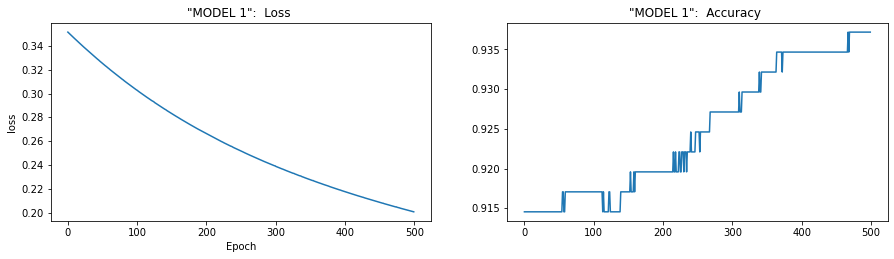

In [300]:
plt.figure(figsize=(15,8))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.title('"MODEL 1":  Loss ')


#plt.subplot(2, 2, 2)
#plt.plot(history1.history['val_loss'])
#plt.title('"MODEL2": Validation Loss ')

    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('"MODEL 1":  Accuracy ')

#plt.subplot(2, 2, 3)
#plt.xlabel('Number of Epochs')
#plt.ylabel('Error')
#plt.plot(history.history['mean_squared_error'])
#plt.title('"MODEL 1":   Mean Squared Error')


#plt.subplot(2, 2, 4)
#plt.plot(history1.history['val_accuracy'])
#plt.title('"MODEL2": Validation Accuracy ')
#plt.show()


In [296]:
predictions = np.argmax(model_1.predict(testing_inputs), axis=-1)

In [297]:
print(classification_report(testing_outputs,predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       107
         1.0       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [298]:
confusion_matrix(testing_outputs,predictions)


array([[104,   3],
       [  9,  55]], dtype=int64)